# **Car Price Prediction**

---

The prices of new cars in the industry is fixed by the manufacturer.
So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase.There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Using this notebook we can train a model to predict a car price on the basis of there feature.


*   Justifications during data cleaning(Identifying null values, filling missing values and removing outliers)
*   Exploratory Data Analysis (EDA)
*   Performing machine learning models: Random Forest, Linear Regression
*   Comparison of the performance of the models
*   Feature Selection using p-value
*   Reporting the findings of the study in notebook's final result
*   Single User Input Data






In [1]:
# importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('/content/drive/My Drive/Mechademy')

In [3]:
df= pd.read_csv('cars_price.csv',index_col=0)            #load data

In [4]:
os.getcwd()

'/content/drive/My Drive/Mechademy'

In [5]:
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [6]:
# Observe the data using describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
priceUSD,40000.0,7430.383775,8338.242134,95.0,2350.0,5350.0,9850.0,195000.0
year,40000.0,2003.485625,8.114896,1938.0,1998.0,2004.0,2010.0,2019.0
mileage(kilometers),40000.0,243433.200218,316703.266582,0.0,137000.0,228000.0,308761.0,9999999.0
volume(cm3),39970.0,2103.201676,938.724653,500.0,1600.0,1995.0,2300.0,20000.0


**OBSERVATION**


*   Minimum Price of Car is 95 USD and maximum price is 195000 USD.
*   Given Data is from 1938 to 2019.
*   Minimum mileage(kilometers) is 0.







In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


## **Data Cleaning and pre-processing**

In [8]:
#missing data
df.isnull().sum().sort_values(ascending=False)

segment                3755
drive_unit             1345
volume(cm3)              30
transmission              0
color                     0
fuel_type                 0
mileage(kilometers)       0
condition                 0
year                      0
priceUSD                  0
model                     0
make                      0
dtype: int64

In given Dataset, three columns have missing values
1.   segment
2.   drive unit
3.   volume(cm3)

So, we need to fill or drop these missing values.In this case i will drop the rows with missing values.



In [9]:
df.dropna(inplace=True)

Check the number of duplicates in the dataset and after that remove the duplicates.

In [10]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(45, 12)

As we can see, there are 45 duplicate rows in this dataset which I will remove from the dataset.

In [11]:
df = df[~df.duplicated()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34971 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 34971 non-null  object 
 1   model                34971 non-null  object 
 2   priceUSD             34971 non-null  int64  
 3   year                 34971 non-null  int64  
 4   condition            34971 non-null  object 
 5   mileage(kilometers)  34971 non-null  float64
 6   fuel_type            34971 non-null  object 
 7   volume(cm3)          34971 non-null  float64
 8   color                34971 non-null  object 
 9   transmission         34971 non-null  object 
 10  drive_unit           34971 non-null  object 
 11  segment              34971 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


In [13]:
df.nunique()

make                     51
model                   458
priceUSD               2328
year                     62
condition                 3
mileage(kilometers)    5755
fuel_type                 2
volume(cm3)             352
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

**Outlier**

As we saw earlier that few of the cars have mileage as zero which may not be correct.

In [14]:
df[df['mileage(kilometers)']==0].count()

make                   98
model                  98
priceUSD               98
year                   98
condition              98
mileage(kilometers)    98
fuel_type              98
volume(cm3)            98
color                  98
transmission           98
drive_unit             98
segment                98
dtype: int64

There are 98 rows with 0 value as mileage.

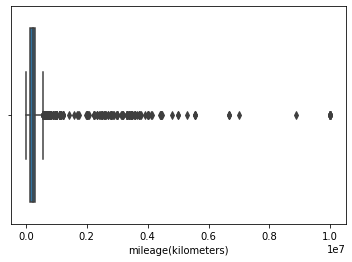

In [15]:
sns.boxplot(x=df['mileage(kilometers)'])

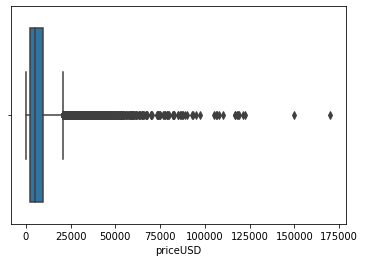

In [16]:
sns.boxplot(x=df['priceUSD'])

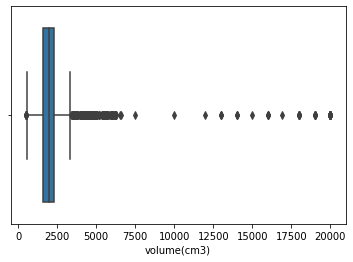

In [17]:
sns.boxplot(x=df['volume(cm3)'])

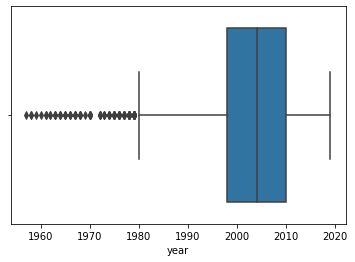

In [18]:
sns.boxplot(x=df['year'])

As we can notice from the boxplots, we don't only have very low points but we also have a lot of high points.

In order to detect and remove outliers we are going to use a technique called "IQR score technique".

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

priceUSD                 7400.0
year                       12.0
mileage(kilometers)    170417.0
volume(cm3)               700.0
dtype: float64


In [20]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]  #remove outliers from dataset
df.shape

(31404, 12)

In [21]:
df[df['mileage(kilometers)']==0].count()

make                   87
model                  87
priceUSD               87
year                   87
condition              87
mileage(kilometers)    87
fuel_type              87
volume(cm3)            87
color                  87
transmission           87
drive_unit             87
segment                87
dtype: int64

We haven't deleted all rows where the mileage is equal to 0, but deleted 11 of them.

## **Exploratory Data Analysis (EDA)**

EDA helps in better data understanding by visualizing, summarizing and interpreting the information that is hidden in data.

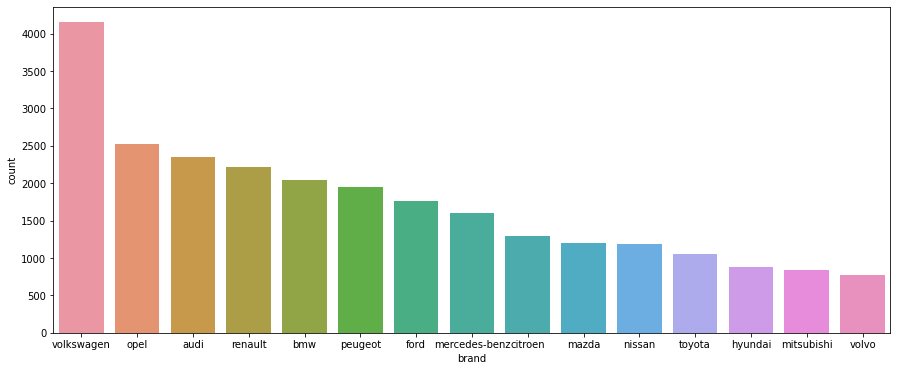

In [22]:
brand_of_car = df.groupby('make')['model'].count().reset_index().sort_values('model',ascending = False).head(15)
brand_of_car = brand_of_car.rename(columns = {'make':'brand','model':'count'})
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(data=brand_of_car, x='brand',y='count', ax=ax)

Cleary Volkswagen is most comman brand followed by opel,audi and others in the given dataset.

Text(0.5, 0, 'Year')

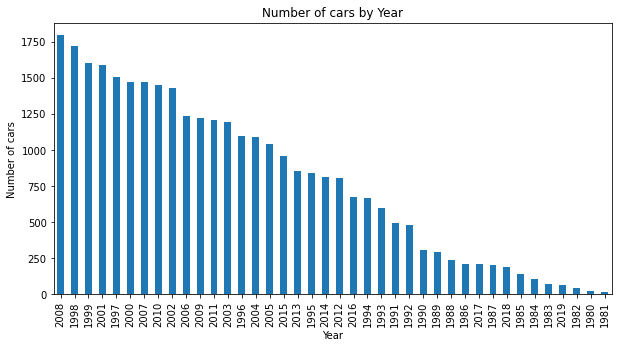

In [23]:
df['year'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Year")
plt.ylabel("Number of cars")
plt.xlabel("Year")

Highest number of cars in dataset is from 2008

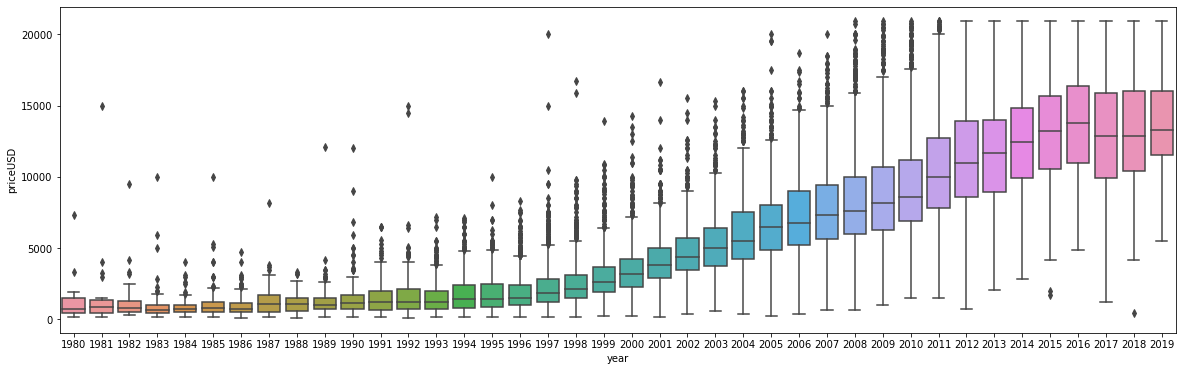

In [24]:
#year vs price

plt.figure(figsize=(20,6))
sns.boxplot(y=df['priceUSD'], x=df['year'])

Clearly, it's a strong tendency.

Price of Newest is high as compared to old models.

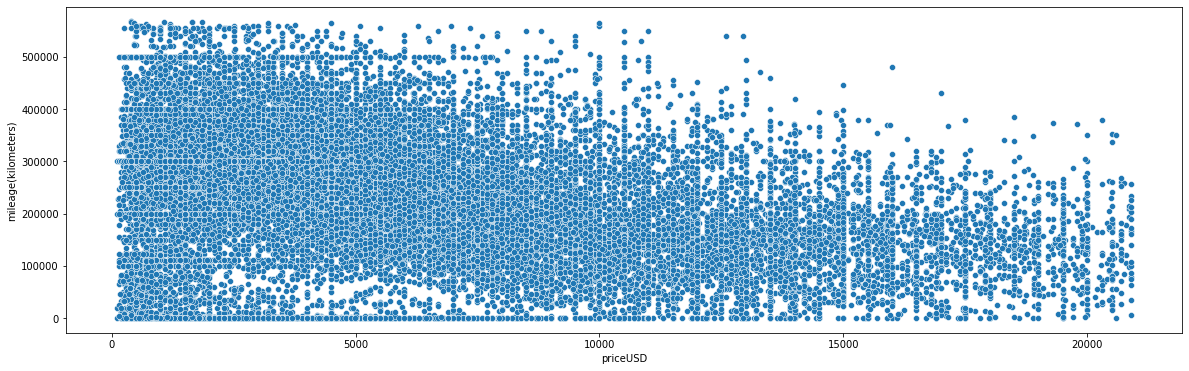

In [25]:
#mileage vs price

plt.figure(figsize=(20,6))
sns.scatterplot(x=df['priceUSD'], y=df['mileage(kilometers)'])

Overall Less expensive cars has more mileage as compare to highly expensive cars.

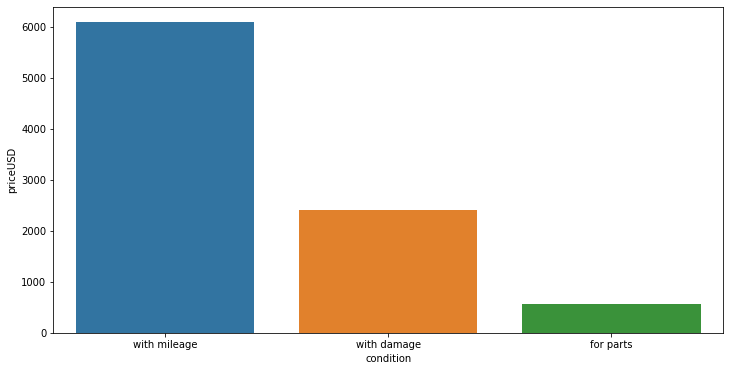

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['condition'], y=df['priceUSD'],ci=None)

Damaged cars have less price than one with in good condition whereas cars which can be used for parts after buying is of lowest price.
As the information from the dataset through this graph condition is one of the most important feature for price prediction.

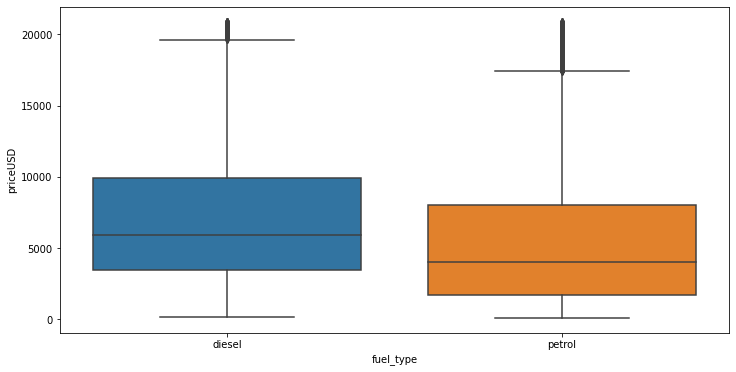

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['priceUSD'], x=df['fuel_type'])

As, we thought diseal car is more expensive as compare to petrol car.

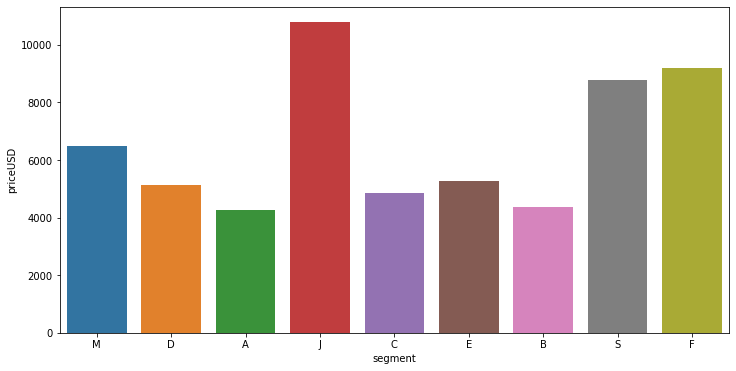

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['segment'], y=df['priceUSD'],ci=None)

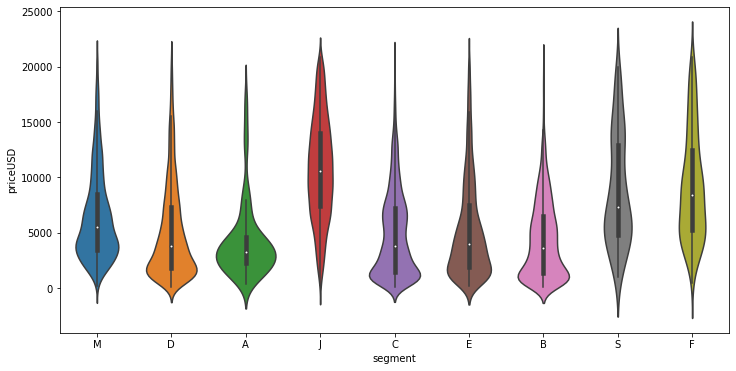

In [29]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['segment'], y=df['priceUSD'])

After seeing above two graphs, its clear that segment-J car's price range is highest followed by segment-S car's. Segment-J,S,F cars in the dataset is nearly of all prices or you can say normally distributed whereas others segments cars price are concentrated between some range  

Black,gray,white,brown and silver colour car is present in all price range

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.798456,-0.349542,0.225421
year,0.798456,1.000000,-0.431562,-0.069314
mileage(kilometers),-0.349542,-0.431562,1.000000,0.232888
volume(cm3),0.225421,-0.069314,0.232888,1.000000


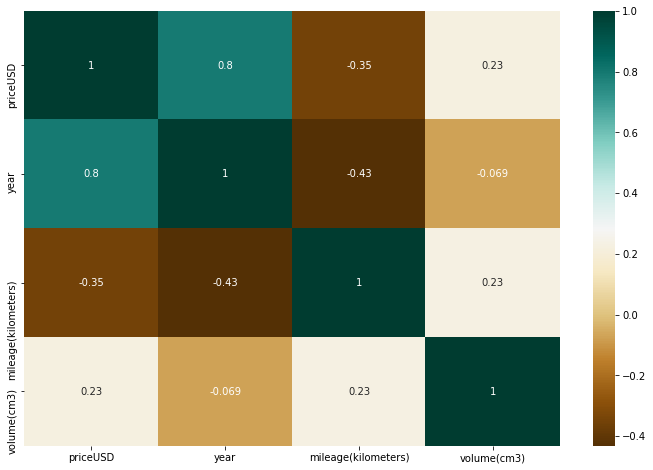

In [30]:
# Finding the relations between the variables using heatmap
plt.figure(figsize=(12,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In the above heat map we know that the price feature depends mainly on the year and the mileage as positive and negative corelation respectively.

Now,

Let's delete all useless features, I will remove two column make and model as it contains only car brands and its models name which will not add much value in prediction.

In [31]:
df.drop(["make"],axis=1,inplace=True)
df.drop(["model"],axis=1,inplace=True)

In [32]:
df.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
1,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
5,18900,2016,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J


###### **Working with Categorical Data**


As for now we have left with only 6 categorical features:



1.   model
2.   condition
3.   Fuel_Type
4.   transmission
5.   segment
6.   color
7.   drive_unit


For handeling categorical data. We mostly use these 2 path:



*   OneHotEncoder
*   LabelEncoder


Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

In this case I will use pandas get_dummies feature for handling categorical data.



**Working for Fuel_Type**

In [33]:
Fuel_t = df[['fuel_type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_type_petrol
1,0
2,1
3,1
4,0
5,0


**Working for condition**

In [34]:
condition = df[['condition']]
condition = pd.get_dummies(condition,drop_first=True)
condition.head()

,condition_with damage,condition_with mileage
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1


**Working for transmission**

In [35]:
Transmission = df[['transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_mechanics
1,1
2,0
3,1
4,1
5,1


**Working for segment**

In [36]:
segment = df[['segment']]
segment = pd.get_dummies(segment,drop_first=True)
segment.head()

,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0


**Working for color**

In [37]:
color = df[['color']]
color = pd.get_dummies(color,drop_first=True)
color.head()

,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0


**Working for drive_unit**

In [38]:
drive_unit = df[['drive_unit']]
drive_unit = pd.get_dummies(drive_unit,drop_first=True)
drive_unit.head()

,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [39]:
final_df= pd.concat([df,condition,Fuel_t,Transmission,color,segment,drive_unit],axis=1)
final_df.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,18900,2016,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [40]:
final_df.drop(["condition","fuel_type","transmission","color","segment","drive_unit"],axis=1,inplace=True)

In [41]:
final_df.head()

,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,5550,2008,172000.0,1400.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,8300,2008,223000.0,2500.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3300,2005,140000.0,1200.0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2450,2002,413000.0,2200.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,18900,2016,148000.0,1600.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [42]:
X = final_df.iloc[:,1:]
X.head()

,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,2008,172000.0,1400.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,2008,223000.0,2500.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2005,140000.0,1200.0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2002,413000.0,2200.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,2016,148000.0,1600.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [43]:
y = final_df.iloc[:,[0]]
y.head()

,priceUSD
1,5550
2,8300
3,3300
4,2450
5,18900


## **Machine learning models**
First we are spliting the data to train and test for the model

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# X_train = mm_scaler.fit_transform(X_train)
# X_test =mm_scaler.transform(X_test)                      # comment the feature scaling section because it does not help to increase accuracy,
                                                           #if you want to use ,please uncomment and run

**Linear regression**

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1632.648622172583
Mean Squared  Error      :  4757383.325634388
Root Mean Squared  Error :  2181.1426651263296
R Squared           :  0.7775104172286407


Not a good score, let's try something more better.

Now I am using  ExtraTrees Regressor and Random Forest Regressor (obviously for better accuracy)


**ExtraTrees Regressor**

In [47]:
ext_reg = ExtraTreesRegressor()
ext_reg.fit(X_train, y_train)
y_pred= ext_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1089.017999124343
Mean Squared  Error      :  2473844.6735536717
Root Mean Squared  Error :  1572.8460425463363
R Squared           :  0.8843051670244145


**Random Forest**

In [48]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1019.3474125683795
Mean Squared  Error      :  2136190.1613206784
Root Mean Squared  Error :  1461.5711276980942
R Squared           :  0.9000963291834082


0.9 is a Good R2 Score

## **Feature Selection using p-value**

So in Regression very frequently used techniques for feature selection are as following:


*   Stepwise Regression
*   Forward Selection
*   Backward Elimination

I will use Backward elimination in this case.
In backward elimination in the first step we include all predictors and in subsequent steps, keep on removing the one which has the highest p-value (>.05 the threshold limit). after a few iterations, it will produce the final set of features which are enough significant to predict the outcome with the desired accuracy.

In [49]:
final_df.columns

Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)',
       'condition_with damage', 'condition_with mileage', 'fuel_type_petrol',
       'transmission_mechanics', 'color_blue', 'color_brown', 'color_burgundy',
       'color_gray', 'color_green', 'color_orange', 'color_other',
       'color_purple', 'color_red', 'color_silver', 'color_white',
       'color_yellow', 'segment_B', 'segment_C', 'segment_D', 'segment_E',
       'segment_F', 'segment_J', 'segment_M', 'segment_S',
       'drive_unit_front-wheel drive', 'drive_unit_part-time four-wheel drive',
       'drive_unit_rear drive'],
      dtype='object')

In [50]:
X_opt = X.values
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              4710.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:04:33   Log-Likelihood:                     -2.9835e+05
No. Observations:               31404   AIC:                                  5.968e+05
Df Residuals:                   31374   BIC:                                  5.970e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.7557      0.162     35.618      0.000       5.439       6.072
x2            -0.0113      0.000    -65.504      0.000      -0.012      -0.011
x3            -0.4239      0.064     -6.643      0.000      -0.549      -0.299
x4          -149.3850    297.415     -0.502      0.615    -732.331     433.561
x5          2361.8660    211.479     11.168      0.000    1947.359    2776.373
x6         -2018.9771     41.513    -48.635      0.000   -2100.344   -1937.610
x7         -3293.1708     46.576    -70.705      0.000   -3384.462   -3201.880
x8         -1913.7846     63.529    -30.124      0.000   -2038.305   -1789.265
x9          1413.3168    131.782     10.725      0.000    1155.019    1671.615
x10        -2610.4866    103.395    -25.248      0.000   -2813.146   -2407.828
x11         -495.1653     69.784     -7.096      0.000    -631.946    -358.385
x12        -2989.2908     80.978    -36.915      0.000   -3148.012   -2830.570
x13         -853.3352    316.177     -2.699      0.007   -1473.055    -233.615
x14        -1473.1873     85.826    -17.165      0.000   -1641.409   -1304.966
x15        -2495.9745    174.316    -14.319      0.000   -2837.640   -2154.309
x16        -2320.0272     92.939    -24.963      0.000   -2502.191   -2137.863
x17        -1428.4587     59.228    -24.118      0.000   -1544.548   -1312.370
x18         -456.6693     74.155     -6.158      0.000    -602.017    -311.322
x19        -2180.0720    267.447     -8.151      0.000   -2704.278   -1655.866
x20         -291.2270    195.425     -1.490      0.136    -674.268      91.814
x21          400.7098    190.714      2.101      0.036      26.903     774.516
x22          886.7398    192.545      4.605      0.000     509.344    1264.136
x23          882.2468    203.287      4.340      0.000     483.796    1280.697
x24         2361.7100    289.722      8.152      0.000    1793.843    2929.577
x25         3877.4821    204.600     18.952      0.000    3476.458    4278.507
x26         2117.8201    196.489     10.778      0.000    1732.694    2502.946
x27         2362.7775    323.207      7.310      0.000    1729.279    2996.276
x28         -903.9241     94.800     -9.535      0.000   -1089.736    -718.113
x29        -1325.9515    108.163    -12.259      0.000   -1537.954   -1113.949
x30        -1088.7051    106.062    -10.265      0.000   -1296.591    -880.819
==============================================================================
Omnibus:                     1715.880   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2262.244
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.            

Removing the highest p-value(x4 or fourth column) and rewriting the code.

In [51]:
X_opt = X.values[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              4872.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:04:33   Log-Likelihood:                     -2.9835e+05
No. Observations:               31404   AIC:                                  5.968e+05
Df Residuals:                   31375   BIC:                                  5.970e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.7188      0.144     39.721      0.000       5.437       6.001
x2            -0.0113      0.000    -65.519      0.000      -0.012      -0.011
x3            -0.4239      0.064     -6.644      0.000      -0.549      -0.299
x4          2436.5157    150.447     16.195      0.000    2141.634    2731.397
x5         -2018.9950     41.512    -48.636      0.000   -2100.361   -1937.629
x6         -3293.0094     46.574    -70.704      0.000   -3384.297   -3201.722
x7         -1913.6693     63.528    -30.123      0.000   -2038.187   -1789.152
x8          1413.6371    131.779     10.727      0.000    1155.345    1671.929
x9         -2610.3381    103.394    -25.247      0.000   -2812.994   -2407.682
x10         -495.2697     69.783     -7.097      0.000    -632.048    -358.492
x11        -2989.1058     80.977    -36.913      0.000   -3147.823   -2830.388
x12         -854.0182    316.171     -2.701      0.007   -1473.725    -234.311
x13        -1473.2265     85.825    -17.166      0.000   -1641.446   -1305.007
x14        -2495.8696    174.313    -14.318      0.000   -2837.531   -2154.209
x15        -2319.4473     92.931    -24.959      0.000   -2501.595   -2137.299
x16        -1428.6276     59.226    -24.122      0.000   -1544.713   -1312.542
x17         -456.5390     74.154     -6.157      0.000    -601.884    -311.194
x18        -2180.2076    267.443     -8.152      0.000   -2704.407   -1656.008
x19         -291.8750    195.419     -1.494      0.135    -674.903      91.153
x20          400.3293    190.710      2.099      0.036      26.530     774.129
x21          886.1551    192.539      4.602      0.000     508.770    1263.540
x22          881.6303    203.281      4.337      0.000     483.192    1280.069
x23         2360.7988    289.713      8.149      0.000    1792.950    2928.648
x24         3876.9173    204.595     18.949      0.000    3475.904    4277.931
x25         2117.1288    196.482     10.775      0.000    1732.017    2502.241
x26         2363.1476    323.202      7.312      0.000    1729.658    2996.637
x27         -903.9177     94.799     -9.535      0.000   -1089.727    -718.109
x28        -1325.9916    108.161    -12.259      0.000   -1537.992   -1113.991
x29        -1088.5760    106.061    -10.264      0.000   -1296.459    -880.693
==============================================================================
Omnibus:                     1715.277   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2261.464
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                     8.03e+06
=============================================================


Removing the highest p-value(x19 or 20th column) and rewriting the code.

In [52]:
X_opt = X.values[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              5046.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:04:33   Log-Likelihood:                     -2.9835e+05
No. Observations:               31404   AIC:                                  5.968e+05
Df Residuals:                   31376   BIC:                                  5.970e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.5915      0.116     48.198      0.000       5.364       5.819
x2            -0.0113      0.000    -65.509      0.000      -0.012      -0.011
x3            -0.4280      0.064     -6.713      0.000      -0.553      -0.303
x4          2438.4478    150.444     16.208      0.000    2143.572    2733.324
x5         -2020.2855     41.504    -48.677      0.000   -2101.636   -1938.935
x6         -3296.0826     46.530    -70.838      0.000   -3387.283   -3204.882
x7         -1914.3133     63.528    -30.133      0.000   -2038.831   -1789.796
x8          1411.0032    131.770     10.708      0.000    1152.730    1669.277
x9         -2610.2041    103.396    -25.245      0.000   -2812.864   -2407.544
x10         -497.2644     69.772     -7.127      0.000    -634.020    -360.509
x11        -2990.5311     80.973    -36.933      0.000   -3149.240   -2831.822
x12         -855.8088    316.175     -2.707      0.007   -1475.524    -236.094
x13        -1473.9301     85.825    -17.174      0.000   -1642.151   -1305.710
x14        -2494.1853    174.313    -14.309      0.000   -2835.846   -2152.525
x15        -2321.1614     92.926    -24.979      0.000   -2503.299   -2139.024
x16        -1429.9420     59.221    -24.146      0.000   -1546.017   -1313.867
x17         -458.3833     74.145     -6.182      0.000    -603.711    -313.056
x18        -2176.2178    267.435     -8.137      0.000   -2700.402   -1652.034
x19          664.5674     71.215      9.332      0.000     524.982     804.152
x20         1151.2202     74.676     15.416      0.000    1004.853    1297.588
x21         1148.4301     97.030     11.836      0.000     958.248    1338.612
x22         2628.7358    227.496     11.555      0.000    2182.835    3074.637
x23         4142.4419    101.267     40.906      0.000    3943.955    4340.929
x24         2382.2459     84.249     28.276      0.000    2217.115    2547.376
x25         2631.6572    268.596      9.798      0.000    2105.199    3158.115
x26         -904.1961     94.800     -9.538      0.000   -1090.009    -718.384
x27        -1325.8992    108.163    -12.258      0.000   -1537.904   -1113.895
x28        -1091.9691    106.038    -10.298      0.000   -1299.808    -884.130
==============================================================================
Omnibus:                     1718.248   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2267.568
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       3.791   Cond. No.                     4.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

New Adj. r-squared value : 81.9%
We can see our accuracy does not change a little bit after removing two columns  thus we will keep all the previous columns. Thus the final_df is the relevant dataframe to train model and also random forest regressor give good result ,so i will use randomforest regressor

## **Final Result**

> From all analysis i understand that final_df is the relevant dataframe to train model and also random forest regressor give good result ,so i will use random forest regressor.



In [53]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1019.6156768283283
Mean Squared  Error      :  2134592.0666658613
Root Mean Squared  Error :  1461.0243210384492
R Squared           :  0.9001710676244045


We get an R2 score of 0.90 with Random forest regressor

## **Car price prediction for single user Input Data**

> Here we can predict the price of a single car to be sold using above trained model, by taking the features of that car as an input.


> By making few changes in code of below cells we can make predictions of multiple cars at once. But for now, I predict the price of a single car at a time for  user input data.





In [54]:
def pre_processing_usertestcase(test_df):   #preprocess the test data
  test_df.dropna(inplace=True)
  duplicate_rows_testdf = test_df[test_df.duplicated()]
  duplicate_rows_testdf.shape
  test_df = test_df[~test_df.duplicated()]
  return test_df

def remove_outlier(test_df):    #remove all outliers, used when multipe data or dataframe withe multiple rows.
  Q1 = test_df.quantile(0.25)
  Q3 = test_df.quantile(0.75)
  IQR = Q3 - Q1
  test_df = test_df[~((test_df < (Q1-1.5 * IQR)) |(test_df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return test_df

def drop(test_df):
  test_df.drop(["make"],axis=1,inplace=True)
  test_df.drop(["model"],axis=1,inplace=True)
  return test_df

def handle_categorical(test_df):           #this  function will handle all categorical features
  fuel_type_val= 'fuel_type' + '_' + test_df['fuel_type'][0]
  if fuel_type_val in test_df.columns:
    test_df[fuel_type_val] = 1             #replace 0 with 1 where the condition satifies or category meet

  condition_val= 'condition' + '_' + test_df['condition'][0]
  if condition_val in test_df.columns:
    test_df[condition_val] = 1

  transmission_val= 'transmission' + '_' + test_df['transmission'][0]
  if transmission_val in test_df.columns:
    test_df[transmission_val] = 1

  segment_val= 'segment' + '_' + test_df['segment'][0]
  if segment_val in test_df.columns:
    test_df[segment_val] = 1

  color_val= 'color' + '_' + test_df['color'][0]
  if color_val in test_df.columns:
    test_df[color_val] = 1

  drive_unit_val= 'drive_unit' + '_' + test_df['drive_unit'][0]
  if drive_unit_val in test_df.columns:
    test_df[drive_unit_val] = 1
  test_df.drop(["condition","fuel_type","transmission","color","segment","drive_unit"],axis=1,inplace=True)
  
  return test_df
  


Taking all the necessary details of a car as an input used for price prediction. 

In [55]:
print("Enter the car company brand")
make=input()
print("Enter the car model")fusio
model=input()
print("Enter the year")
year=int(input())
print("Enter the condition of car")
condition=input()
print("Enter the mileage in kilometers")
mileage=int(input())
print("Enter the fuel type for car")
fuel_type=input()
print("Enter volume of car")
volume = int(input())
print("Enter colour of car")
color=input()
print("Enter transmision of car, mechanics or auto")
transmission=input()
print("Enter drive unit type")
drive_unit=input()
print("Enter segment type")
segment=input()


Enter the car company brand
ford
Enter the car model
fusion
Enter the year
2008
Enter the condition of car
with damage
Enter the mileage in kilometers
220000
Enter the fuel type for car
diesel
Enter volume of car
1900
Enter colour of car
black
Enter transmision of car, mechanics or auto
mechanics
Enter drive unit type
front-wheel drive
Enter segment type
M


converting input data taken in the form of proper dataframe format after all preprocessing and then predict using trained modelac 

In [56]:
test_data ={'make':[make],'model':[model],'year':[year],'condition':[condition],'mileage(kilometers)':[mileage],'fuel_type':[fuel_type],'volume(cm3)':[volume],'color':[color],'transmission':[transmission],'drive_unit':[drive_unit],'segment':[segment]}
test_df = pd.DataFrame(test_data) 

#creating new dataframe for categorical feature and assuming all of them as 0 and replace it with 1 when handle categorical data through function calling. 
new_df = pd.DataFrame(np.zeros(shape=(1,len(X.columns[3:]))).astype(int),columns=(X.columns[3:])) 

#concat both data frames 
test_df = pd.concat([test_df,new_df],axis=1) 

#Comment below two lines of code because i taken a user input data for a single car price prediction. You may uncomment it when deal with more data.
# test_df = pre_processing_usertestcase(test_df)            
# test_df = remove_outlier(test_df)

test_df = drop(test_df)                #to drop unnecessary column
test_df = handle_categorical(test_df)  #for encoding of categorical variable

#make prediction using final data
y_pred= rf_reg.predict(test_df)

print("Predicted price of a car is",y_pred[0],"USD")

Predicted price of a car is 5506.55 USD


As the model predict some price in each case, on the basis of features.